## Accessing Dataset

In [1]:
# Getting list of scans inside a study folder
from ilib.datamodel import iScan
iScan.list(r'.\data\Test_Study')

** INFO    ** [<unknown>            000000000000] Setting LogLevel to 20
Listing for ".\data\Test_Study":

| Name           | FolderName   |   Sweeps | Date                        | Study      | Path               |
|----------------+--------------+----------+-----------------------------+------------+--------------------|
| Day-1_SuM1_air | Scan_1       |       40 | 2021-04-19 08:52:00 (-0500) | Test_Study | Scan_1\Scan_1.msot |
| Day-1_SuM1_O2  | Scan_2       |       40 | 2021-04-19 08:58:44 (-0500) | Test_Study | Scan_2\Scan_2.msot |
| Day-1_SuM1_ICG | Scan_3       |      200 | 2021-04-19 09:01:39 (-0500) | Test_Study | Scan_3\Scan_3.msot |

Output produced in 0.732 seconds


([<iScan D#2PW0YHatM31fsgAu at AAACK9JhGRA=>,
  <iScan D#BLVYsoJQkQ2z4RDN at AAACK9k6uRA=>,
  <iScan D#bbALfahurgNOn2i+ at AAACK9k70cA=>],
 '| Name           | FolderName   |   Sweeps | Date                        | Study      | Path               |\n|----------------+--------------+----------+-----------------------------+------------+--------------------|\n| Day-1_SuM1_air | Scan_1       |       40 | 2021-04-19 08:52:00 (-0500) | Test_Study | Scan_1\\Scan_1.msot |\n| Day-1_SuM1_O2  | Scan_2       |       40 | 2021-04-19 08:58:44 (-0500) | Test_Study | Scan_2\\Scan_2.msot |\n| Day-1_SuM1_ICG | Scan_3       |      200 | 2021-04-19 09:01:39 (-0500) | Test_Study | Scan_3\\Scan_3.msot |')

In [2]:
# Access individual dataset
from ilib.datamodel import iScan
scan = iScan(r'.\data\Test_Study\Scan_1\Scan_1.msot')
scan

<iScan D#2PW0YHatM31fsgAu at AAACK9k73BA=>

In [3]:
# Some Scan Properties
print('Number of Frames (Signals) in the dataset: ' + str(scan.NFrames))
print('Number of Sweeps: ' + str(scan.NSweep)) # 1 sweep equivalent to multispectral image
print('Number of Wavelengths: ' + str(scan.NWavelengths))
scan.openSignalFile()

Number of Frames (Signals) in the dataset: 240
Number of Sweeps: 40
Number of Wavelengths: 6


## Loading of Signals

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from ilib.datamodel import iScan, iSignal


# Access the dataset
scan = iScan('.\data\Test_Study\Scan_1\Scan_1.msot')

# Load all signals as an array
signals = iSignal.from_scan(scan)
signals.shape

(40, 6, 256, 2030)

In [5]:
# Get Sweep number 5 (first sweep is 0) - Sweep is one cycle of wavelengths
signal = iSignal.from_scan(scan, [4])

# Get shape of signal array
# OUT: (1, 6, 256, 2030)
# Dimensions: 
#   0: number of sweeps
#   1: number of wavelengths
#   2: number of detectors
#   3: number of time samples
signal.shape

(1, 6, 256, 2030)

In [6]:
# Get list of Wavelengths
signal.Wavelength

array([700, 730, 760, 800, 850, 875], dtype=uint16)

In [7]:
# Get time points relative to start of acquisition
signal.RelTime

array([14.382823, 14.985857, 15.584891, 16.175924, 16.801962, 17.387995],
      dtype=float32)

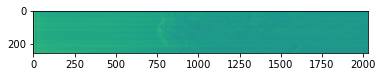

In [8]:
# ** Plot one signal matrix from the third wavelength (760 nm)
subsig = signal[0, 2, :, :]
plt.imshow(subsig)
plt.show()

In [9]:
# ** Transform to regular numpy array (removes additional attributes)
# NOTE: iSignal behaves like a numpy array in all respects, so can be used 
# for any calculations just like a plain array. Still, the below is necessary 
# for some functions
myarray = np.squeeze(signal.view(np.ndarray))
print(myarray.shape)
myarray

(6, 256, 2030)


array([[[33558, 33572, 33576, ..., 33423, 33386, 33405],
        [34397, 34406, 34405, ..., 34371, 34218, 34160],
        [33421, 33447, 33450, ..., 32956, 32835, 32790],
        ...,
        [33589, 33596, 33588, ..., 33352, 33192, 33101],
        [34763, 34777, 34767, ..., 34790, 34637, 34512],
        [33824, 33825, 33806, ..., 33373, 33226, 33188]],

       [[33803, 33801, 33822, ..., 33513, 33448, 33512],
        [34572, 34587, 34606, ..., 34444, 34254, 34148],
        [33617, 33615, 33621, ..., 32902, 32813, 32898],
        ...,
        [33350, 33333, 33352, ..., 33381, 33345, 33292],
        [34557, 34570, 34573, ..., 34992, 34811, 34606],
        [33594, 33592, 33601, ..., 33632, 33432, 33354]],

       [[33828, 33825, 33787, ..., 33523, 33420, 33395],
        [34526, 34547, 34562, ..., 34383, 34151, 34040],
        [33605, 33613, 33624, ..., 32829, 32652, 32685],
        ...,
        [33726, 33753, 33718, ..., 33344, 33245, 33245],
        [34816, 34827, 34833, ..., 34829, 347

In [10]:
# ** Detector positions# This might be relevant for reconstruction:
senspos = scan.Probe.get_sensors()
print(senspos.shape)

(256, 3)
